In [1]:
# import libraries
import pandas as pd
import numpy as np

In [3]:
# loading data set
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [4]:
# checking data row and coloumns
df.shape

(20640, 10)

**Independent and dependent var**

In [5]:
# independedent data 
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [6]:
#dependented data
df["target"]=df.median_house_value
df["target"]

0        452600
1        358500
2        352100
3        341300
4        342200
          ...  
20635     78100
20636     77100
20637     92300
20638     84700
20639     89400
Name: target, Length: 20640, dtype: int64

In [7]:
#Explore the data for reduce unwantedcolumns in it 
# data pre process

In [8]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
target                  0
dtype: int64

In [9]:
df.drop(["longitude","latitude","median_house_value","target"],axis=1)

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,41,880,129.0,322,126,8.3252,NEAR BAY
1,21,7099,1106.0,2401,1138,8.3014,NEAR BAY
2,52,1467,190.0,496,177,7.2574,NEAR BAY
3,52,1274,235.0,558,219,5.6431,NEAR BAY
4,52,1627,280.0,565,259,3.8462,NEAR BAY
...,...,...,...,...,...,...,...
20635,25,1665,374.0,845,330,1.5603,INLAND
20636,18,697,150.0,356,114,2.5568,INLAND
20637,17,2254,485.0,1007,433,1.7000,INLAND
20638,18,1860,409.0,741,349,1.8672,INLAND


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
 10  target              20640 non-null  int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 1.7+ MB


In [11]:
# total_bedrooms      20433  have none value need to replace with frequent value 
df["total_bedrooms"].value_counts()

280.0     55
331.0     51
345.0     50
343.0     49
393.0     49
          ..
2961.0     1
1915.0     1
1215.0     1
3298.0     1
1052.0     1
Name: total_bedrooms, Length: 1923, dtype: int64

In [12]:
df["total_bedrooms"].mode()[0]

280.0

In [13]:
# total_bedrooms  missing value filled with 280
df["total_bedrooms"]=df["total_bedrooms"].fillna(df["total_bedrooms"].mode()[0])
df["total_bedrooms"].unique()

array([ 129., 1106.,  190., ..., 3008., 1857., 1052.])

In [14]:
# Label encoder initialize for preprocess the ocean_proximity
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [15]:
df["ocean_proximity"]=le.fit_transform(df["ocean_proximity"])
df["ocean_proximity"].unique() # no non value


array([3, 0, 1, 4, 2])

In [16]:
df.isnull().sum() # data don't have none value now

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
target                0
dtype: int64

In [17]:
# models using  and remove unwanted fields
y=df.iloc[:,-1]
df.drop(labels=["target","median_house_value","longitude","latitude"],axis=1,inplace=True)

In [18]:
X=df.iloc[:,:].values

In [19]:
# data split 80:20
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Decision tree


In [21]:
from sklearn.tree import DecisionTreeClassifier
cls=DecisionTreeClassifier()
cls.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [22]:
y_pred=cls.predict(X_test)
y_pred

array([ 48700,  73100, 500001, ..., 500001,  93000, 201300])

In [23]:
# accuracy of the Decition tree
from sklearn.metrics import r2_score
accuracy = r2_score(y_test,y_pred)*100
accuracy

38.682906859740264

In [24]:
# calc MSE
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_test,y_pred,squared=False)
MSE

89638.42332985885

## Checking model with external I/p value

In [25]:
ip=np.array([52,1467,190.0,496,177,7.2574,3])
ip=ip.reshape((1,-1))

In [26]:
op=cls.predict(ip)
print(f"what is amount of this mentioned details [52,1467,190.0,496,177,7.2574,3] = {op}")

what is amount of this mentioned details [52,1467,190.0,496,177,7.2574,3] = [352100]


## Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [28]:
cls2=RandomForestClassifier()

In [132]:
cls2=RandomForestClassifier()
cls2.fit(X_train,y_train)
y_pred=cls2.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)

## Linear Regression 

In [30]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [35]:
# original data model coeff and intercept
lm.fit(X,y)
print(f"coeff value for original data set {lm.coef_}")

print(f"intercept_ value for original data set {lm.intercept_}")

coeff value for original data set [ 1.80597108e+03 -1.84880001e+01  6.79973942e+01 -3.50458680e+01
  1.53518335e+02  4.72832986e+04  4.42114328e+03]
intercept_ value for original data set -47438.1020624511


In [ ]:
# trained model coeff and intercept 

In [37]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
print(f"coeff value for trained data set {lm.coef_}")
print(f"intercept_ value for trained data set {lm.intercept_}")

coeff value for trained data set [ 1.84281689e+03 -2.04801898e+01  1.03232060e+02 -3.39731843e+01
  1.23390221e+02  4.80797245e+04  4.01963337e+03]
intercept_ value for trained data set -51484.087149107596


In [40]:
# y_prediction

In [41]:
lm_pred=lm.predict(X_test)
print(f"model predicted {lm_pred}")

model predicted [ 74526.3092009  117047.89330818 248509.30160755 ... 425935.51243906
 166343.15870535 160335.76187807]


 Linear Regeression MSE

In [50]:
from sklearn.metrics import mean_squared_error
import math
print(math.sqrt(mean_squared_error(lm_pred,y_test)))
from sklearn.metrics import r2_score
r_squr = r2_score(y_test,lm_pred)
print(f"accuracy of the models {r_squr}")
print(f"MSE Value ------------------->{mean_squared_error(lm_pred,y_test)}")
print(f"RMSE Value ------------------->{math.sqrt(mean_squared_error(lm_pred,y_test))}")

77029.81628854056
accuracy of the models 0.5471953645027985
MSE Value ------------------->5933592597.446308
RMSE Value ------------------->77029.81628854056


In [51]:
# using state models for improving accuracy 

In [52]:
import statsmodels.api as smf
X_train_smf=smf.add_constant(X_train)
lr=smf.OLS(y_train,X_train_smf).fit()

In [53]:
lr.params

const   -51484.087149
x1        1842.816894
x2         -20.480190
x3         103.232060
x4         -33.973184
x5         123.390221
x6       48079.724470
x7        4019.633370
dtype: float64

In [69]:
Model=lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     3156.
Date:                Thu, 02 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:33:25   Log-Likelihood:            -2.0891e+05
No. Observations:               16512   AIC:                         4.178e+05
Df Residuals:                   16504   BIC:                         4.179e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.148e+04   2526.090    -20.381      0.000   -5.64e+04   -4.65e+04
x1          1842.8169     50.691     36.354      0.000    1743.458    1942.176
x2           -20.4802      0.938    -21.835      0.000     -22.319     -18.642
x3           103.2321      8.403     12.285      0.000      86.762     119.702
x4           -33.9732      1.301    -26.122      0.000     -36.522     -31.424
x5           123.3902      9.067     13.608      0.000     105.618     141.163
x6          4.808e+04    381.612    125.991      0.000    4.73e+04    4.88e+04
x7          4019.6334    422.457      9.515      0.000    3191.573    4847.694
==============================================================================
Omnibus:                     3245.984   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10949.435
Skew:                           0.984   Prob(JB):                         0.00
Kurtosis:                       6.470   Cond. No.                     1.70e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
X_test_smf=smf.add_constant(X_test)
y_test_predict= lr.predict(X_test_smf)


In [131]:
# mse value 
print(f"MSE Value ------------------->{mean_squared_error(y_test_predict,y_test)}")
print(f"RMSE Value ------------------->{math.sqrt(mean_squared_error(y_test_predict,y_test))}")

MSE Value ------------------->5933592597.446303
RMSE Value ------------------->77029.81628854053


# Based on median_income field house value prediction


In [111]:
# Perform Linear Regression with one independent variable
data = pd.read_csv("housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [112]:
y=data.iloc[:,-1].values
X=data.iloc[:,-3].values
data.drop(["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","ocean_proximity"],axis=1)

,median_income,median_house_value
0,8.3252,452600
1,8.3014,358500
2,7.2574,352100
3,5.6431,341300
4,3.8462,342200
...,...,...
20635,1.5603,78100
20636,2.5568,77100
20637,1.7000,92300
20638,1.8672,84700


In [113]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [114]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [115]:
x_train= X_train.reshape(-1, 1)
x_test = X_test.reshape(-1, 1)
model=lm.fit(x_train,y_train)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [116]:
y_pred=lm.predict(x_test)
y_pred


array([114958.91676996, 150606.88213964, 190393.71844449, ...,
       431500.77230409, 161245.49973085, 193412.95560084])

In [117]:
r_squr = r2_score(y_test,y_pred)
r_squr

0.45885918903846656

In [118]:
# mse value 
print(f"MSE Value ------------------->{mean_squared_error(y_pred,y_test)}")
print(f"RMSE Value ------------------->{math.sqrt(mean_squared_error(y_pred,y_test))}")


MSE Value ------------------->7091157771.76555
RMSE Value ------------------->84209.01241414454


In [119]:
x_samp=pd.DataFrame({'median_income':[8.3252]}) # origina value 402600
y_sam_pred1=lm.predict(x_samp)[0]
print(f"median income is 8.3252 and value of the house is  {y_sam_pred1}")

median income is 8.3252 and value of the house is  393567.41214244824


# **minimum and maximum value plot**

[ 65422.46048105 673471.66346121]
   median_income
0         0.4999
1        15.0001


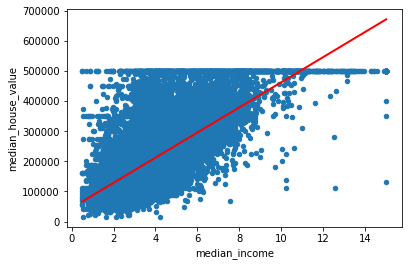

In [85]:
import matplotlib.pyplot as plt
x_new=pd.DataFrame({'median_income':[data.median_income.min(),data.median_income.max()]})
print(y_pred)
print(x_new)
y_pred=lm.predict(x_new)
data.plot(kind="scatter",x="median_income",y="median_house_value") # relation ship bw x and y
plt.plot(x_new,y_pred,c='r',linewidth=2)

Using state model and try to improve accuracy

In [89]:
import statsmodels.formula.api as smf
lm1=smf.ols(formula="median_house_value~median_income",data=data).fit()
print(lm1.conf_int())
print(lm1.pvalues)
print(f"r squred value {lm1.rsquared}")
print(f"r squred adj value {lm1.rsquared_adj}")

                          0             1
Intercept      42492.643908  47678.509499
median_income  41192.485706  42395.212698
Intercept        9.882299e-248
median_income     0.000000e+00
dtype: float64
r squred value 0.47344749180719914
r squred adj value 0.47342197807000586


**acuracy checking manually**

In [107]:
#value check
#y=mx+c
y=41933.84939381*8.3252	+44459.72916907875
y

393567.4121424258

In [120]:
x_samp=pd.DataFrame({'median_income':[8.3252]}) # origina value 402600
y_sam_pred1=lm.predict(x_samp)[0]
print(f"median income is 8.3252 and value of the house is  {y_sam_pred1}")


median income is 8.3252 and value of the house is  393567.41214244824
